<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.3: Measurements

Building upon the forward feature selection technique, we apply it to the diabetes dataset. By iterating over the entire dataset, we identify the subset of features that yield the best adjusted R-squared score. Furthermore, we visualize the results by plotting the R-squared and adjusted R-squared values, providing insights into the model's performance with different feature combinations.

In [2]:
## Import Libraries

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 1. Forward Feature Selection

> Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2  and  AdjustedR2  in this case).

#### 1.1 Load Diabetics Data Using datasets of sklearn

The `sklearn.datasets` package embeds some small toy datasets and provides helpers to fetch larger datasets commonly used by the machine learning community to benchmark algorithms on data that comes from the ‘real world’.

In [3]:
## Load the Diabetes dataset

# Load the diabetes dataset from sklearn
diabetes = datasets.load_diabetes()

In [4]:
# Description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
# Predictors
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

In [7]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [6]:
# Target
y = diabetes.target

In [8]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### 1.2 Use Forward Feature Selection to pick a good model

**Hint: Same as Lab 4.2.2**

- Add R^2 value in a list
- Add Adjusted R^2 in another list
- Display both R^2 and Adjusted R^2

In [ ]:
## Flag intermediate output

show_steps = False   # for testing/debugging
# show_steps = False  # without showing steps

In [11]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]

r2_list = []
adjusted_r2_list = []

In [12]:
excluded = list(X.columns)
excluded

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [14]:
improved = True
# print(f'R^2: {best["r2"]}, adjusted R^2: {best["a_r2"]}')

while improved:
    improved = False # reset flag

    # test all currently excluded columns one at a time
    # any time a feature exceeds the current best, update best to match
    for new_feature in excluded:
        fit = model.fit(X_train[included + [new_feature]], y_train)
        r2 = model.score(X_train[included + [new_feature]], y_train)
        k = len(included) + 1
        adj_r2 = 1 - (1-r2) * (n-1) / (n - k - 1)

        if adj_r2 > best['a_r2']:
            improved = True
            best = {'feature':new_feature, 'r2':r2, 'a_r2':adj_r2}
            r2_list.append(r2)
            adjusted_r2_list.append(adj_r2)
            
    if improved:
        print(f'{best["feature"]} improves the model')
        # print(f'R^2: {best["r2"]}, adjusted R^2: {best["a_r2"]}')
        included.append(best['feature'])
        excluded.remove(best['feature'])


print('\nFinal results:')
print(f'R^2: {best["r2"]}, adjusted R^2: {best["a_r2"]}')
print(f'Included features: {", ".join(included)}')
print(f'Features not included: {", ".join(excluded)}')

bmi improves the model
s5 improves the model
bp improves the model
s1 improves the model
s2 improves the model
sex improves the model
s4 improves the model

Final results:
R^2: 0.5260093076371375, adjusted R^2: 0.5163921051833983
Included features: bmi, s5, bp, s1, s2, sex, s4
Features not included: age, s3, s6


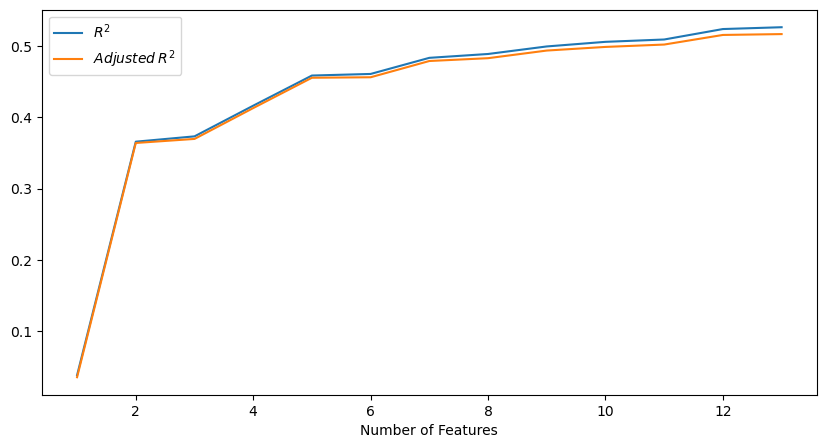

In [15]:
## Chart both R^2 and Adjusted R^2

_range = range(1, len(r2_list)+1)

# define chart size
plt.figure(figsize = (10, 5))
# plot each metric
plt.plot(_range, r2_list, label = '$R^2$')
plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')
# add some better visualization
plt.xlabel('Number of Features')
plt.legend()
# output the chart
plt.show()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



